In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

df = pd.read_csv('movies.csv')
data = df.copy()

In [21]:
data.shape

(63000, 15)

In [22]:
data.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'budget', 'original_language', 'popularity',
       'genres', 'production_companies', 'production_countries',
       'spoken_languages'],
      dtype='object')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63000 entries, 0 to 62999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    63000 non-null  int64  
 1   title                 63000 non-null  object 
 2   vote_average          63000 non-null  float64
 3   vote_count            63000 non-null  int64  
 4   status                63000 non-null  object 
 5   release_date          62973 non-null  object 
 6   revenue               63000 non-null  int64  
 7   runtime               63000 non-null  int64  
 8   budget                63000 non-null  int64  
 9   original_language     63000 non-null  object 
 10  popularity            63000 non-null  float64
 11  genres                62517 non-null  object 
 12  production_companies  56870 non-null  object 
 13  production_countries  60859 non-null  object 
 14  spoken_languages      62046 non-null  object 
dtypes: float64(2), int6

In [24]:
data.isna().sum().sort_values(ascending=False)

production_companies    6130
production_countries    2141
spoken_languages         954
genres                   483
release_date              27
id                         0
title                      0
vote_average               0
vote_count                 0
status                     0
revenue                    0
runtime                    0
budget                     0
original_language          0
popularity                 0
dtype: int64

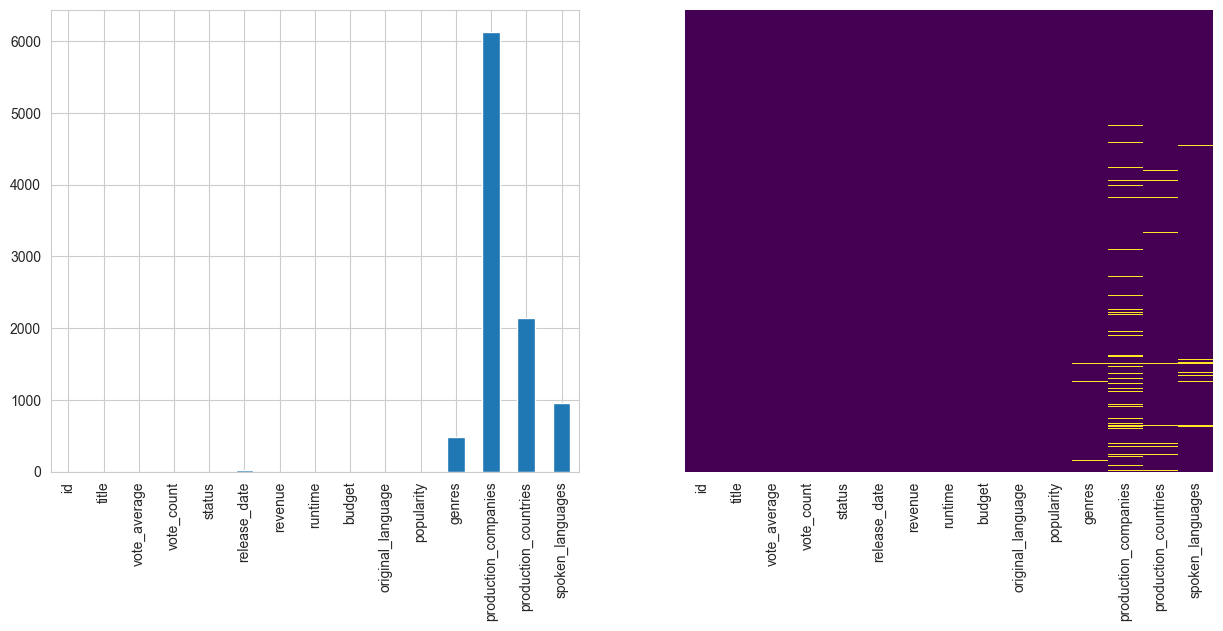

In [136]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
data.isna().sum().plot(kind='bar', ax=ax1)
sns.heatmap(data.isnull(),yticklabels=False, cbar=False, cmap='viridis',ax=ax2)
plt.show()

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False, cbar=False, cmap='viridis')

Text(0, 0.5, 'Number of movies')

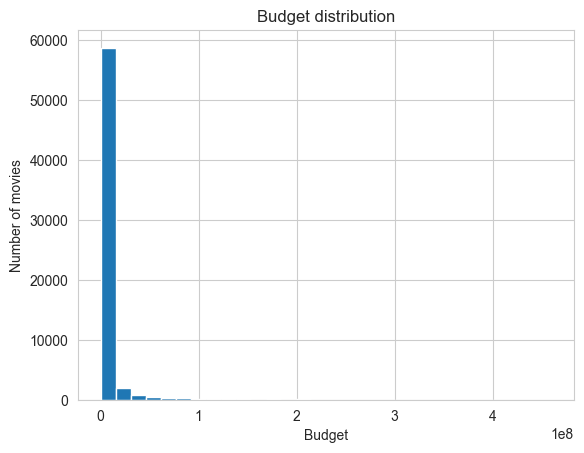

In [26]:
# First we will analyse numerical columns of the dataset using histograms
plt.figure()
data['budget'].hist(bins=30)
plt.title('Budget distribution')
plt.xlabel("Budget")
plt.ylabel("Number of movies")

In [27]:
print('The x axis represents the ranges of the budget while the y axis represents the number of movies')
print('It is evident that the distribution of the budget is highly right skewed and there is an existance of extreme cases')
print('The majority of the variables are near zero or have very low budget')
print('There are extreme outliers, with some movies having much larger budget than the majority')
print('Skewness and extreme values suggest that we might have to handle outliers when preprocessing')
print('The amount of movies with budget above 1e8 (100000000$) is:')
print((data['budget'] > 1e8).sum())

The x axis represents the ranges of the budget while the y axis represents the number of movies
It is evident that the distribution of the budget is highly right skewed and there is an existance of extreme cases
The majority of the variables are near zero or have very low budget
There are extreme outliers, with some movies having much larger budget than the majority
Skewness and extreme values suggest that we might have to handle outliers when preprocessing
The amount of movies with budget above 1e8 (100000000$) is:
453


Text(0.5, 1.0, 'Budget Outliers')

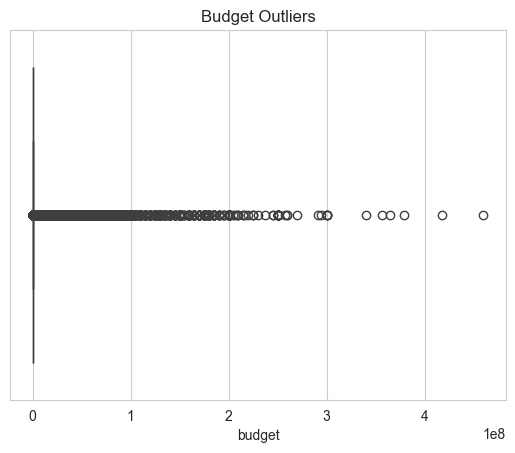

In [40]:
sns.boxplot(x=data['budget'])
plt.title('Budget Outliers')

Text(0, 0.5, 'Number of movies')

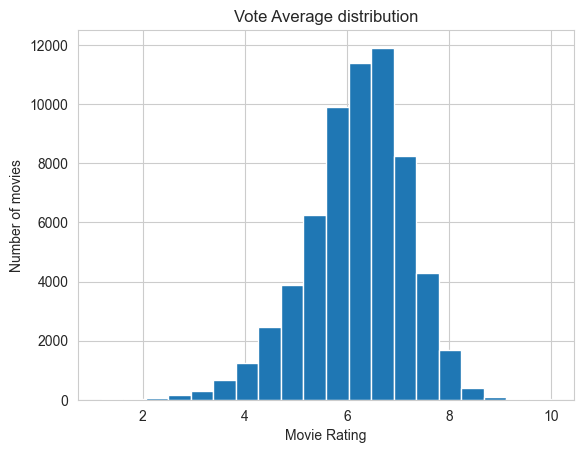

In [28]:
plt.figure()
data['vote_average'].hist(bins=20)
plt.title('Vote Average distribution')
plt.xlabel("Movie Rating")
plt.ylabel("Number of movies")

In [29]:
print('The distribution of the vote average is bell shaped and close to normal')
print('Most movies are rated between 4 and 8 with the highest around 6')
print('This indicates that average is clustered near the middle and there are not many extreme cases affecting the distribution (very low or high ratings)')
print('The distribution is only slightly skewed')

The distribution of the vote average is bell shaped and close to normal
Most movies are rated between 4 and 8 with the highest around 6
This indicates that average is clustered near the middle and there are not many extreme cases affecting the distribution (very low or high ratings)
The distribution is only slightly skewed


In [30]:
# I will compare the mean with the median, if the mean has a higher value then it is right skewed, otherwise left skewed
print(data['vote_average'].mean(), data['vote_average'].median())
print('The movie ratings are slightly left skewed')

6.199307666666667 6.3
The movie ratings are slightly left skewed


Text(0, 0.5, 'Movies')

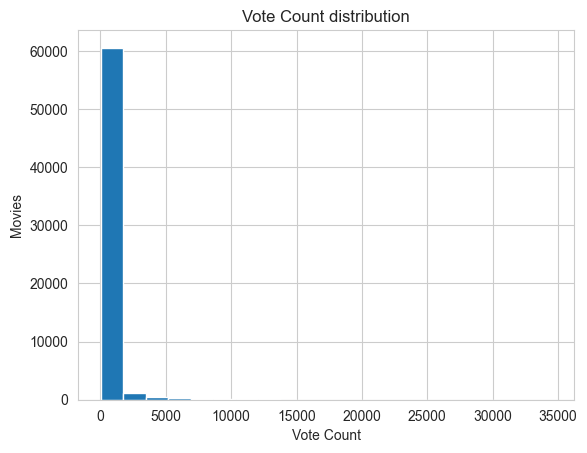

In [32]:
plt.figure()
data['vote_count'].hist(bins=20)
plt.title('Vote Count distribution')
plt.xlabel("Vote Count")
plt.ylabel("Movies")

In [33]:
print('The shape of the distribution is highly right skewed, meaning that the vast majority have a few votes and a small number have a large amount of votes')
print('There are extreme outliers in this case')
print('Transformation or special handling will be required during preprocessing')

The shape of the distribution is highly right skewed, meaning that the vast majority have a few votes and a small number have a large amount of votes
There are extreme outliers in this case
Transformation or special handling will be required during preprocessing


Text(0.5, 1.0, 'vote_count Outliers')

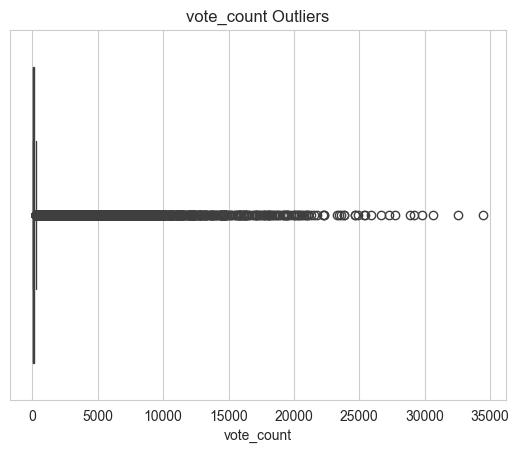

In [42]:
sns.boxplot(x=data['vote_count'])
plt.title('vote_count Outliers')

Text(0, 0.5, 'Number of movies')

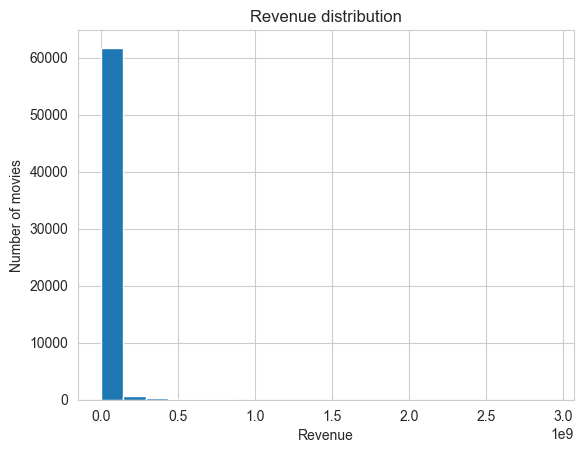

In [53]:
plt.figure()
data['revenue'].hist(bins=20)
plt.title('Revenue distribution')
plt.xlabel("Revenue")
plt.ylabel("Number of movies")

In [54]:
print('The shape of the distribution is highly right skewed, meaning that the vast majority have a small amount of revenue')
print('There are extreme cases corresponding to movies with hundreds of millions or billions in revenue')
print('1e9 stands for 1 billion')
print('Transformation or special handling will be required during preprocessing')

The shape of the distribution is highly right skewed, meaning that the vast majority have a small amount of revenue
There are extreme cases corresponding to movies with hundreds of millions or billions in revenue
1e9 stands for 1 billion
Transformation or special handling will be required during preprocessing


Text(0.5, 1.0, 'Revenue Outliers')

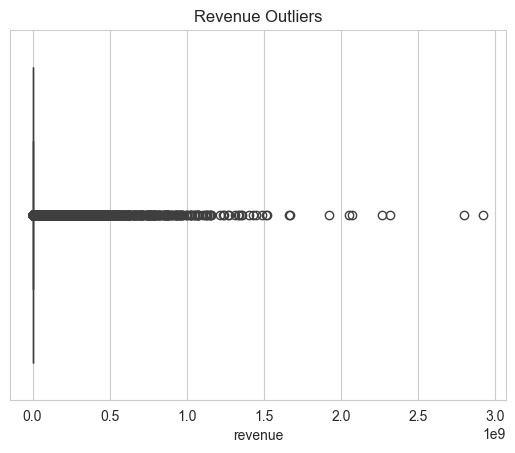

In [55]:
sns.boxplot(x=data['revenue'])
plt.title('Revenue Outliers')

Text(0, 0.5, 'Movies')

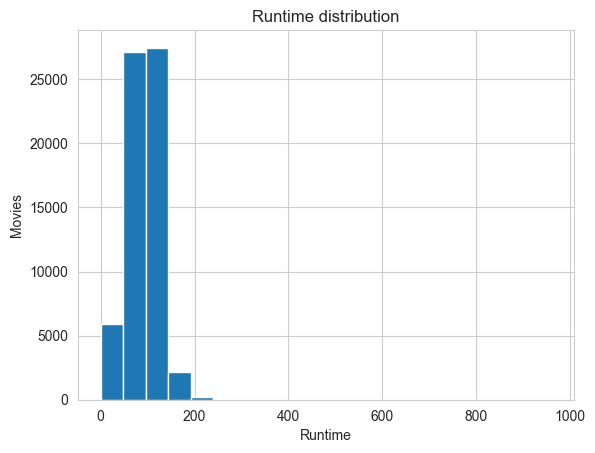

In [56]:
plt.figure()
data['runtime'].hist(bins=20)
plt.title('Runtime distribution')
plt.xlabel("Runtime")
plt.ylabel("Movies")

In [ ]:
print('The shape of the distribution is right skewed, not as extreme as the previous though')
print('There is a small number of movies with unusually long runtimes')
print('Transformation or special handling will be required during preprocessing')

Text(0, 0.5, 'Number of movies')

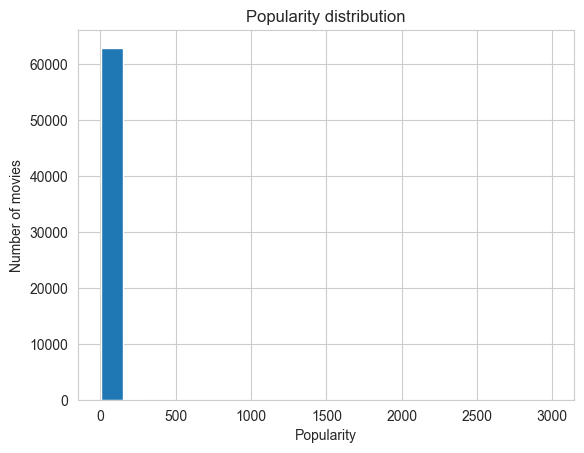

In [58]:
plt.figure()
data['popularity'].hist(bins=20)
plt.title('Popularity distribution')
plt.xlabel("Popularity")
plt.ylabel("Number of movies")

In [73]:
# Since the histogram did not help, we can get data without a visual
print('Information about column')
print(data['popularity'].describe())
print("Bin histogram")
print(pd.cut(data['popularity'], bins=[0,1,2,5,10,20,50,100,500,3000]).value_counts().sort_index())

Information about column
count    63000.000000
mean         8.725862
std         29.559384
min          0.600000
25%          2.849000
50%          4.957000
75%          9.278000
max       2994.357000
Name: popularity, dtype: float64
Bin histogram
popularity
(0, 1]          1080
(1, 2]          6891
(2, 5]         23769
(5, 10]        17023
(10, 20]       10061
(20, 50]        3406
(50, 100]        535
(100, 500]       211
(500, 3000]       24
Name: count, dtype: int64


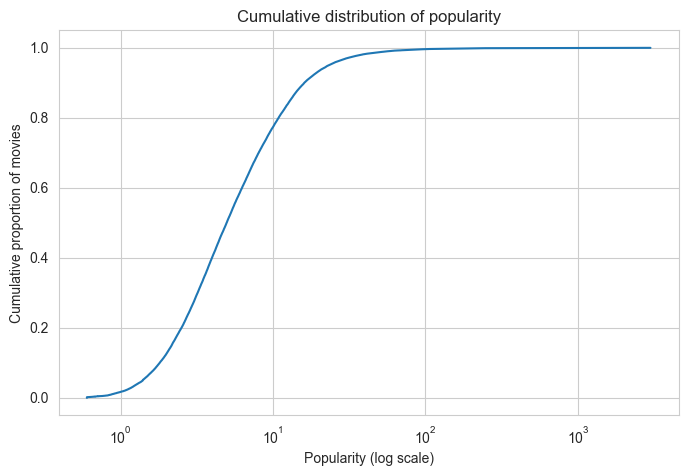

In [72]:
sorted_pop = np.sort(data['popularity'])
cumulative = np.arange(1, len(sorted_pop)+1) / len(sorted_pop)

plt.figure(figsize=(8, 5))
plt.plot(sorted_pop, cumulative)
plt.xscale('log')
plt.xlabel('Popularity value (log scale)')
plt.ylabel('Cumulative proportion of movies')
plt.title('Cumulative distribution of popularity')
plt.show()

In [74]:
print('Used the cumulative distribution function to visualize because histograms fail when distributions are extremely skewed due to outliers')
print('The CDF shows the entire distribution clearly')
print('We can now see that the popularity distribution is concentrated at low values (approx. 80% < 10)')
print('A small fraction of movies account for extremely high popularity and the distribution displays a high right skewness')

Used the cumulative distribution function to visualize because histograms fail when distributions are extremely skewed due to outliers
The CDF shows the entire distribution clearly
We can now see that the popularity distribution is concentrated at low values (approx. 80% < 10)
A small fraction of movies account for extremely high popularity and the distribution displays a high right skewness


In [111]:
# Now we should visualize the categorical columns using bar plots
# Due to high cardinality, many columns will be adjusted to have only the top 20 variables visualized
# So we can create a function that will create the bar plot for our needs
def bar_plot(column_name):
    top_langs = data[column_name].value_counts().head(20)

    plt.figure(figsize=(8,4))
    top_langs.plot(kind='bar')
    plt.title('Top 20 '+column_name)
    plt.xlabel(column_name)
    plt.ylabel('Number of movies')
    plt.show()

In [112]:
data['status'].value_counts()

status
Released    63000
Name: count, dtype: int64

In [113]:
print('All movies in the dataset belong to the released category, so they do not provide useful information for analysis and can be dropped in the preprocessing phase')

All movies in the dataset belong to the released category, so they do not provide useful information for analysis and can be dropped in the preprocessing phase


In [114]:
data['original_language'].value_counts()

original_language
en    36983
fr     5189
it     3012
es     2877
ja     2504
      ...  
se        1
sc        1
mi        1
ga        1
so        1
Name: count, Length: 100, dtype: int64

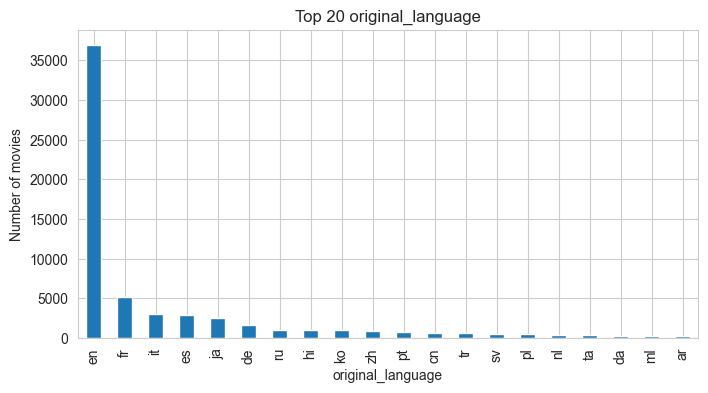

In [116]:
bar_plot('original_language')

In [87]:
print('English demonstrates a strong dominance as the original language')
print('There is a long tail categorical distribution')
print('In preprocessing we can either classify lower languages as "other" or keep only top N languages')

English demonstrates a strong dominance as the original language
There is a long tail categorical distribution
In preprocessing we can either classify lower languages as "other" or keep only top N languages


In [88]:
data['genres'].value_counts()

genres
Drama                                                          5862
Comedy                                                         5505
Documentary                                                    2932
Drama, Romance                                                 1763
Horror                                                         1697
                                                               ... 
Action, Adventure, Romance, History                               1
Romance, Drama, Family, TV Movie                                  1
Science Fiction, Animation, Action, Crime                         1
Animation, Mystery, Thriller, Horror                              1
Adventure, Comedy, Crime, Drama, History, Romance, Thriller       1
Name: count, Length: 5729, dtype: int64

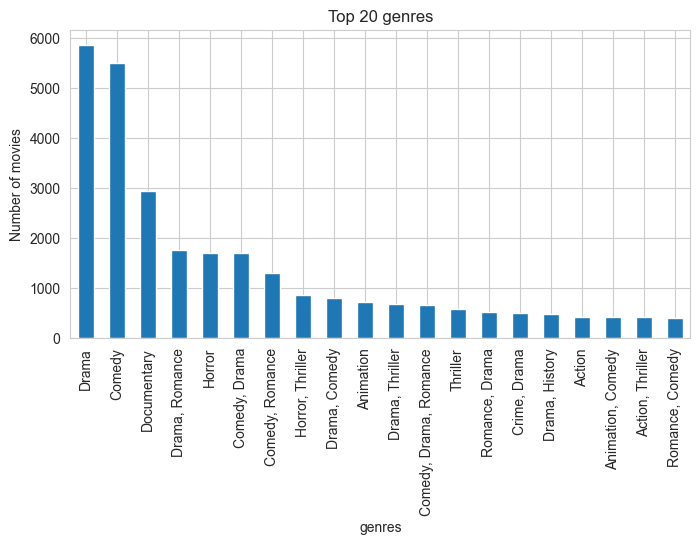

In [117]:
bar_plot('genres')

In [97]:
print('Drama and comedy represent a large amount of the genres in the dataset')
print('There is a long tail categorical distribution')
print('The plot also shows the most frequent genre combinations and not just individual genres')
print('In preprocessing we will either classify genders that do not appear as much as "other" or keep only top N genres')
print('Also in preprocessing we will have to split genres into lists and split them into individual genres')
print('In summary the genres column has high cardinality, many rare category combinations and dominant genres')

Drama and comedy represent a large amount of the genres in the dataset
There is a long tail categorical distribution
The plot also shows the most frequent genre combinations and not just individual genres
In preprocessing we will either classify genders that do not appear as much as "other" or keep only top N genres
Also in preprocessing we will have to split genres into lists and split them into individual genres
In summary the genres column has high cardinality, many rare category combinations and dominant genres


In [98]:
data['production_companies'].value_counts()

production_companies
Metro-Goldwyn-Mayer                                                                                                                                                                 463
Walt Disney Productions                                                                                                                                                             447
Paramount                                                                                                                                                                           378
20th Century Fox                                                                                                                                                                    377
Warner Bros. Pictures                                                                                                                                                               349
                                                           

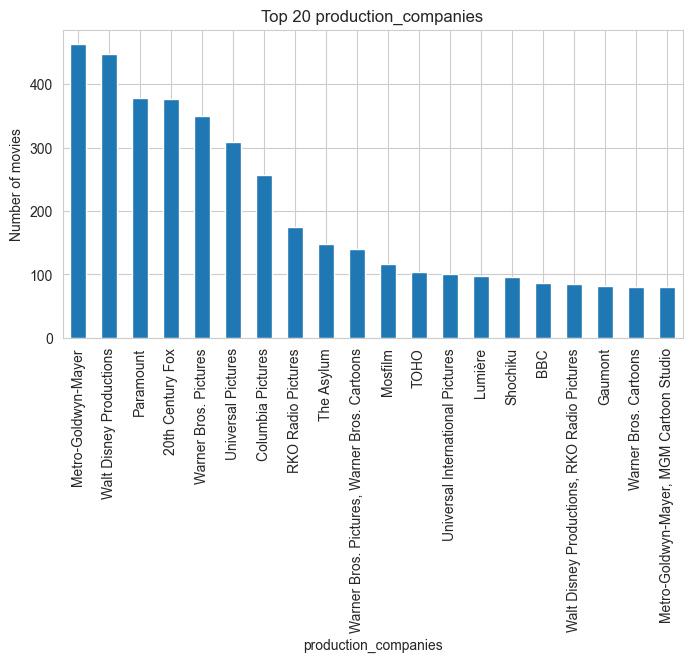

In [118]:
bar_plot('production_companies')

In [102]:
print('A small number of large studios dominate the dataset, there is a long tail and a high imbalance due to a small number of companies producing a large share of the movies.')
print('Additionally, there is high cardinality in this column and multiple production companies per movie')
print('For preprocessing might need to group rare companies to "other" and split combined companies per movie')

A small number of large studios dominate the dataset, there is a long tail and a high imbalance due to a small number of companies producing a large share of the movies.
Additionally, there is high cardinality in this column and multiple production companies per movie
For preprocessing might need to group rare companies to "other" and split combined companies per movie


In [120]:
data['production_countries'].value_counts()

production_countries
United States of America                                           23403
France                                                              3566
United Kingdom                                                      3082
Japan                                                               2381
Italy                                                               2247
                                                                   ...  
Japan, Russia, Canada                                                  1
France, Finland, Germany, Sweden                                       1
Germany, South Africa, United Kingdom, United States of America        1
France, Switzerland, Turkey                                            1
Austria, Canada, Germany, United Kingdom                               1
Name: count, Length: 3243, dtype: int64

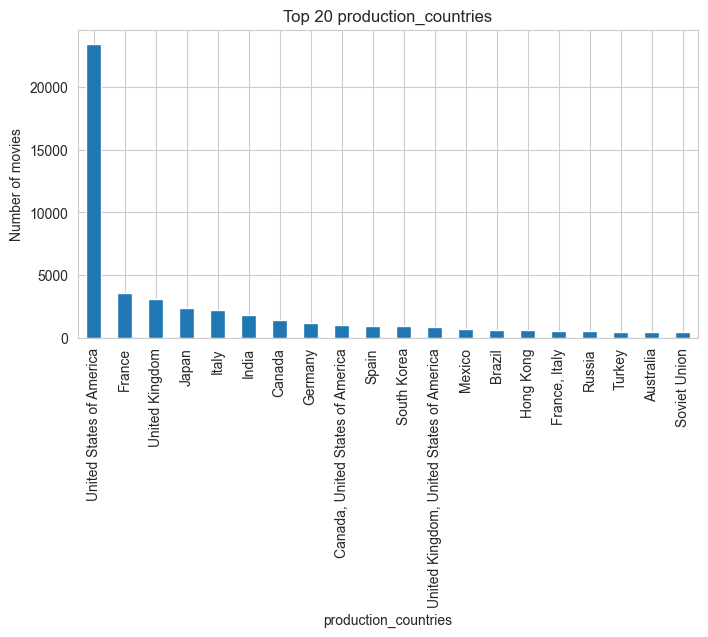

In [119]:
bar_plot('production_countries')

In [123]:
print('The dataset is dominated by few countries, especially US')
print('There is a long tail of rare country combinations, meaning that cardinality is inflated due to multi-valued categorical encoding')
print('For preprocessing might need to group rare companies to "other" and split combined production countries')

The dataset is dominated by few countries, especially US
There is a long tail of rare country combinations, meaning that cardinality is inflated due to multi-valued categorical encoding
For preprocessing might need to group rare companies to "other" and split combined production countries


In [121]:
data['spoken_languages'].value_counts()

spoken_languages
English                                 28702
French                                   3568
Italian                                  2419
Spanish                                  2339
Japanese                                 2249
                                        ...  
French, English, Mandarin, Cantonese        1
Mandarin, Korean, English, Japanese         1
Welsh, English, Latin                       1
English, Danish, French, Italian            1
Hindi, English, Spanish, Catalan            1
Name: count, Length: 2952, dtype: int64

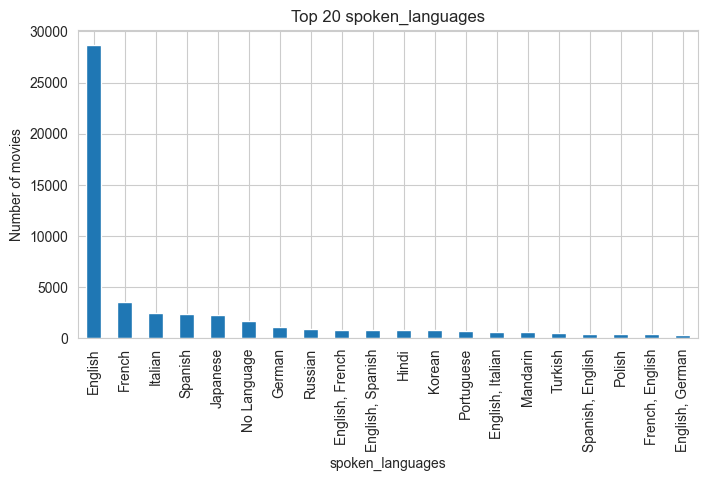

In [122]:
bar_plot('spoken_languages')

In [124]:
print('English is the dominant category and there is a long tail of rare language combinations')
print('Exhibits very high cardinality which mostly artificially inflated thanks to combinations.')
print('For preprocessing we will have to split languages and group non frequent into "other"')

English is the dominant category and there is a long tail of rare language combinations
Exhibits very high cardinality which mostly artificially inflated thanks to combinations.
For preprocessing we will have to split languages and group non frequent into "other"


In [127]:
data['title'].value_counts()

title
Cinderella                                                19
Return                                                    15
Red                                                       13
Alice in Wonderland                                       11
Home                                                      10
                                                          ..
The Tasting                                                1
Chef's Special                                             1
The Lady and the Reaper                                    1
Death Spa                                                  1
Schoolgirl Report Part 7: What The Heart Must Thereby…     1
Name: count, Length: 57867, dtype: int64

In [130]:
print('This categorical feature is not very practical as most titles are unique')
print('Due to very high cardinality, will not be needed in preprocessing')

This plot is not very practical as most titles are unique making this categorical feature not useful
Due to very high cardinality, will not be needed in preprocessing


In [132]:
print('The cardinality of each column is demonstrated in the following table')
data.nunique().sort_values(ascending=False)

The cardinality of each column is demonstrated in the following table


id                      63000
title                   57867
production_companies    40797
release_date            20443
popularity              18834
revenue                 11525
genres                   5729
vote_average             4884
vote_count               3584
production_countries     3243
spoken_languages         2952
budget                   2127
runtime                   323
original_language         100
status                      1
dtype: int64

In [133]:
print('In preprocessing there will be a challenge for high cardinality variables')

In preprocessing there will be a challenge for high cardinality variables


In [22]:
# Second: Checking for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# If any duplicate row is found, we are going to drop it
if duplicates > 0:
    data = data.drop_duplicates()
    print("Duplicates removed.")

Number of duplicate rows: 0


In [23]:
# Convert release_date to datetime, handling mixed formats
# dayfirst=True tells pandas that 15/07/2010 is 15th July, not invalid
data['release_date'] = pd.to_datetime(data['release_date'], format='mixed', dayfirst=True, errors='coerce')

# Extract Year and Month for analysis
data['release_year'] = data['release_date'].dt.year
data['release_month'] = data['release_date'].dt.month_name()

print("Dates converted. Null dates:", data['release_date'].isna().sum())
data.head(3)

Dates converted. Null dates: 27


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,original_language,popularity,genres,production_companies,production_countries,spoken_languages,release_year,release_month
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,160000000,en,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili",2010.0,July
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,165000000,en,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,2014.0,November
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,185000000,en,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin",2008.0,July


In [24]:
# Summary statistics for numerical columns
numerical_stats = data.describe()

# Check specifically for "zero" values which might indicate missing info
zero_budget = (data['budget'] == 0).sum()
zero_revenue = (data['revenue'] == 0).sum()

print(f"Movies with 0 Budget: {zero_budget}")
print(f"Movies with 0 Revenue: {zero_revenue}")
display(numerical_stats)

Movies with 0 Budget: 49470
Movies with 0 Revenue: 50111


,id,vote_average,vote_count,release_date,revenue,runtime,budget,popularity,release_year
count,6.300000e+04,63000.000000,63000.000000,62973,6.300000e+04,63000.000000,6.300000e+04,63000.000000,62973.000000
mean,2.227146e+05,6.199308,326.487032,1998-03-25 13:36:18.247820544,1.116228e+07,92.712603,4.163998e+06,8.725862,1997.711400
min,2.000000e+00,1.179000,14.000000,1874-12-09 00:00:00,0.000000e+00,0.000000,0.000000e+00,0.600000,1874.000000
25%,3.560950e+04,5.600000,22.000000,1987-02-01 00:00:00,0.000000e+00,85.000000,0.000000e+00,2.849000,1987.000000
50%,8.975700e+04,6.300000,41.000000,2007-11-16 00:00:00,0.000000e+00,95.000000,0.000000e+00,4.957000,2007.000000
75%,3.765025e+05,6.900000,126.000000,2016-03-10 00:00:00,0.000000e+00,107.000000,0.000000e+00,9.278000,2016.000000
max,1.186774e+06,10.000000,34495.000000,2023-10-03 00:00:00,2.923706e+09,960.000000,4.600000e+08,2994.357000,2023.000000
std,2.521255e+05,0.992356,1315.334908,NaN,6.718081e+07,34.771182,1.768219e+07,29.559384,24.890506


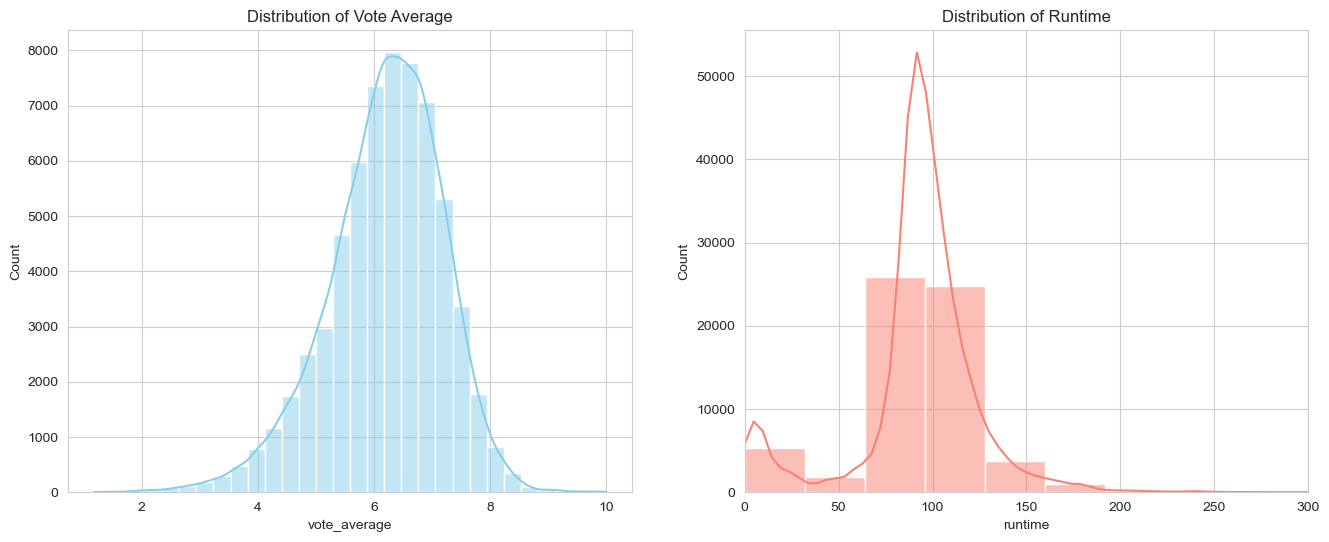

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Vote Average Distribution
sns.histplot(data['vote_average'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Vote Average')

# Runtime Distribution
sns.histplot(data['runtime'], bins=30, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Runtime')
axes[1].set_xlim(0, 300) # Limiting to 300 mins to avoid extreme outliers distorting the view

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_2248\3094621295.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


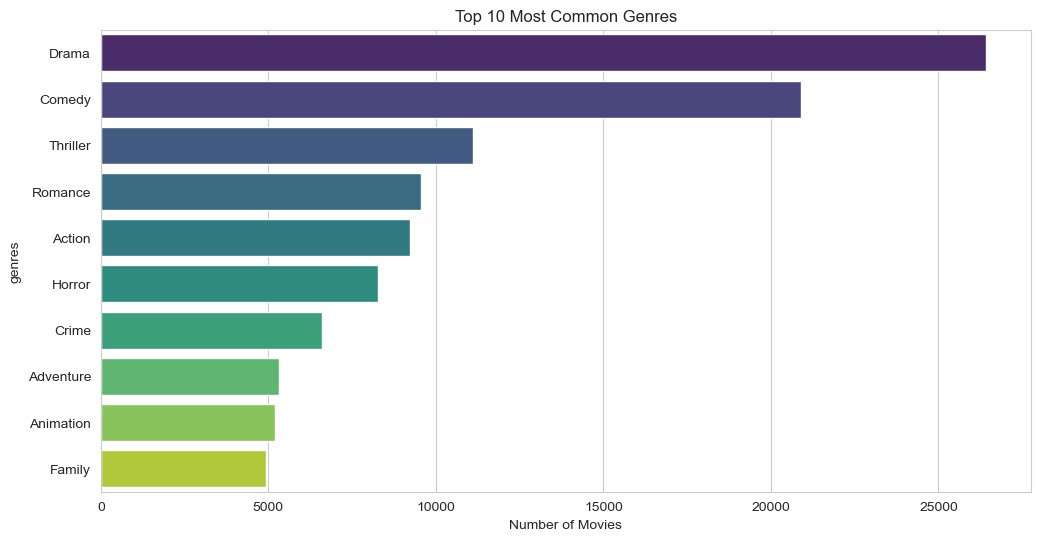

In [27]:
# Split the genres string by comma and explode them into separate rows
genres_exploded = data['genres'].str.split(', ').explode()

# Count the occurrences of each genre
genre_counts = genres_exploded.value_counts().head(10)

# Plot top 10 genres
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Number of Movies')
plt.show()

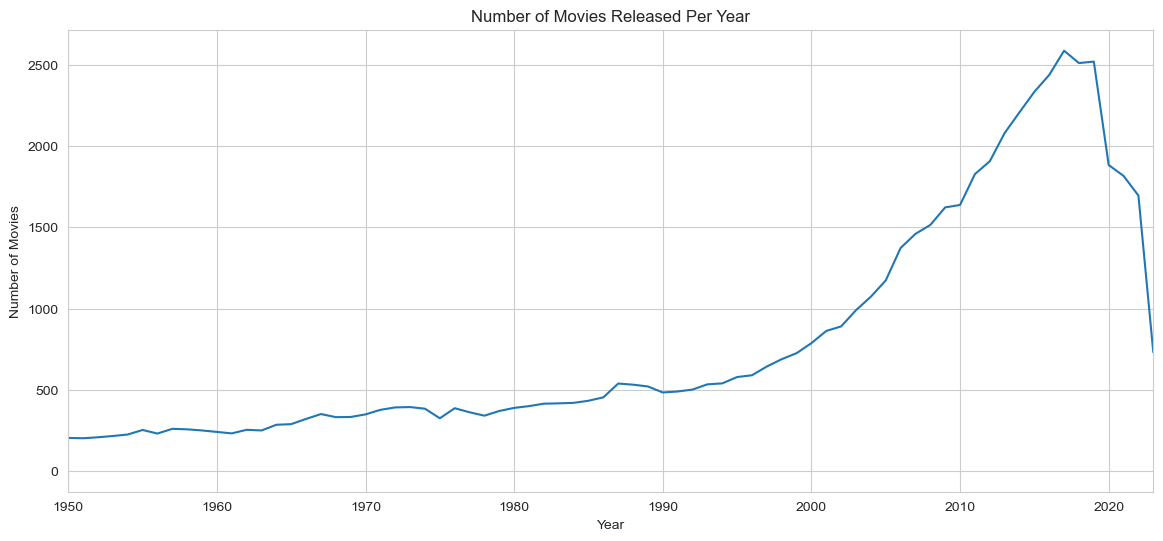

In [28]:
plt.figure(figsize=(14, 6))
# Count movies per year, sort by year
movies_per_year = data['release_year'].value_counts().sort_index()

# Plot line chart
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values)
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xlim(1950, 2023) # Focus on the modern era
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_2248\976765247.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lang_counts.index, y=lang_counts.values, palette='magma')


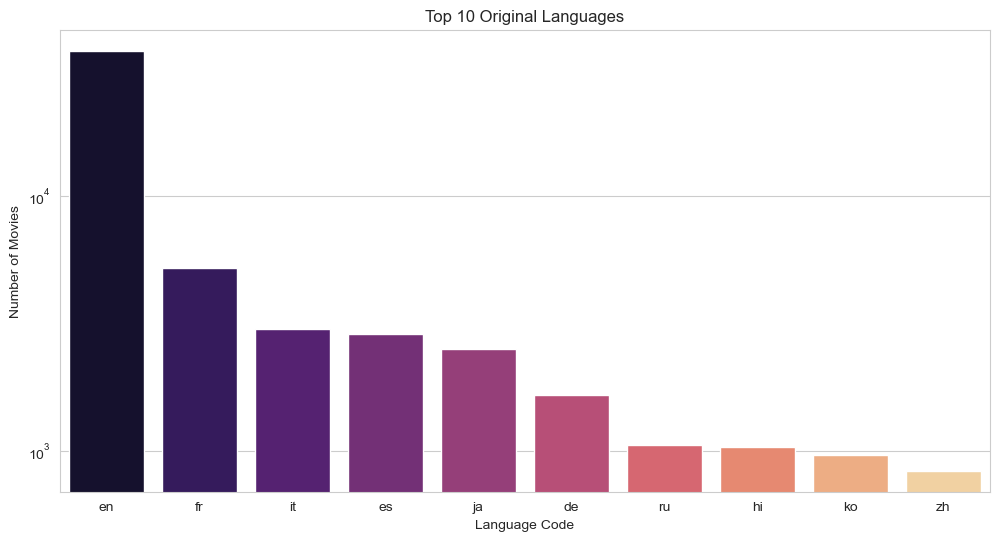

Percentage of movies in English: 58.70%


In [29]:
# Count movies by original language
lang_counts = data['original_language'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=lang_counts.index, y=lang_counts.values, palette='magma')
plt.title('Top 10 Original Languages')
plt.xlabel('Language Code')
plt.ylabel('Number of Movies')
plt.yscale('log') # Log scale helps visualize smaller categories against English
plt.show()

print(f"Percentage of movies in English: {(data['original_language'] == 'en').mean() * 100:.2f}%")

C:\Users\user\AppData\Local\Temp\ipykernel_2248\418862500.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='Spectral')


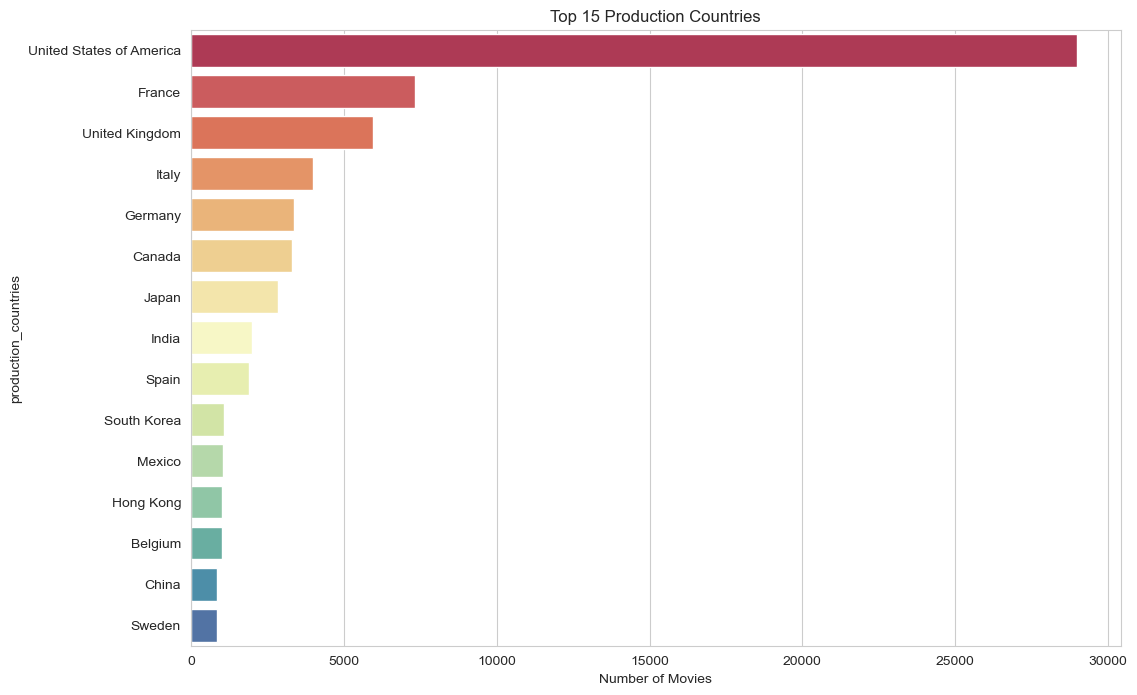

In [30]:
# Handle missing values in production_countries before splitting
countries_exploded = data['production_countries'].fillna('').str.split(', ').explode()

# Remove empty strings (caused by empty rows)
countries_exploded = countries_exploded[countries_exploded != '']

# Plot top 15 Countries
country_counts = countries_exploded.value_counts().head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='Spectral')
plt.title('Top 15 Production Countries')
plt.xlabel('Number of Movies')
plt.show()

## Conclusions from Initial Data Analysis

- The dataset contains approximately 63,000 movies with 15 features, including numerical, categorical, and multi-valued categorical variables.
- Several numerical variables (`budget`, `revenue`, `vote_count`, `popularity`) exhibit strong right skewness and contain extreme values.
- A large proportion of movies have zero or missing values for `budget` and `revenue`, suggesting unreported financial data rather than true zeros.
- Multi-valued categorical features such as `genres`, `production_companies`, `production_countries`, and `spoken_languages` require splitting into individual categories for meaningful analysis.
- Certain categorical variables have very high cardinality (e.g., `title`, `production_companies`), which will require grouping rare categories or alternative encoding strategies.
- The `status` feature contains only a single category and does not provide useful information for further analysis.
- Missing values are concentrated in a small subset of columns and will require column-specific handling during preprocessing.

These observations will guide the preprocessing stage, including missing value treatment, feature transformation, and encoding decisions.
